# Project Name - WalkRunClass

# DATA DESCRIPTION:
                   
The "walkrunclass" dataset appears to be related to a classification problem where the objective is to predict whether an activity is a "walk" or a "run" based on certain features or attributes. This dataset likely contains instances of both walking and running activities, with accompanying features that describe each activity. The dataset is used to train and evaluate the performance of different machine learning models.

# 0.1 Importing Libaries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings as wn 
wn.filterwarnings("ignore")

# 0.2 Reading csv file data

In [51]:
df=pd.read_csv("walkrun.csv")

In [52]:
df

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


# 0.3 Basic Checks

In [5]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [6]:
df.tail()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [7]:
df.shape

(88588, 11)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wrist,88588.0,0.522170,0.499511,0.0000,0.000000,1.0000,1.000000,1.0000
activity,88588.0,0.500801,0.500002,0.0000,0.000000,1.0000,1.000000,1.0000
acceleration_x,88588.0,-0.074811,1.009299,-5.3505,-0.381800,-0.0595,0.355500,5.6033
acceleration_y,88588.0,-0.562585,0.658458,-3.2990,-1.033500,-0.7591,-0.241775,2.6680
acceleration_z,88588.0,-0.313956,0.486815,-3.7538,-0.376000,-0.2210,-0.085900,1.6403
gyro_x,88588.0,0.004160,1.253423,-4.4306,-0.920700,0.0187,0.888800,4.8742
gyro_y,88588.0,0.037203,1.198725,-7.4647,-0.644825,0.0393,0.733700,8.4980
gyro_z,88588.0,0.022327,1.914423,-9.4800,-1.345125,0.0069,1.398200,11.2662


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


###  * Finding Null Values 

In [39]:
 df.isna().sum() 

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

####  Insight:
* No Null Values

### * Convert the 'date' and 'time' columns to strings and combine them

In [53]:
df['datetime'] = df['date'].astype(str) + ' ' + df['time'].astype(str)

### * Convert the combined column to datetime

In [54]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S:%f')
df.datetime

0       2017-06-30 13:51:15.847724020
1       2017-06-30 13:51:16.246945023
2       2017-06-30 13:51:16.446233987
3       2017-06-30 13:51:16.646117985
4       2017-06-30 13:51:16.846738994
                     ...             
88583   2017-07-09 20:09:15.317911028
88584   2017-07-09 20:09:15.517889022
88585   2017-07-09 20:09:15.717828989
88586   2017-07-09 20:09:15.917932987
88587   2017-07-09 20:09:16.117410004
Name: datetime, Length: 88588, dtype: datetime64[ns]

### * Droping the date,time and username

In [55]:
df.drop(['date', 'time', 'username', 'wrist'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   activity        88588 non-null  int64         
 1   acceleration_x  88588 non-null  float64       
 2   acceleration_y  88588 non-null  float64       
 3   acceleration_z  88588 non-null  float64       
 4   gyro_x          88588 non-null  float64       
 5   gyro_y          88588 non-null  float64       
 6   gyro_z          88588 non-null  float64       
 7   datetime        88588 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 5.4 MB


### * Sorted by datetime  in df

In [56]:
df = df.sort_values(by=['datetime'])
df

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,datetime
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,2017-06-30 13:51:15.847724020
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,2017-06-30 13:51:16.246945023
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,2017-06-30 13:51:16.446233987
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,2017-06-30 13:51:16.646117985
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,2017-06-30 13:51:16.846738994
...,...,...,...,...,...,...,...,...
52153,1,-0.3145,-0.5619,0.2554,-1.4393,0.1370,-1.5961,2017-07-17 20:16:02.884990990
52155,1,0.2041,0.4117,-0.1134,0.8280,0.8089,1.9331,2017-07-17 20:16:03.285188019
52156,1,-2.9406,0.4090,0.0523,2.2648,0.2342,3.7748,2017-07-17 20:16:03.485148012
52157,1,-0.0219,-0.5711,0.1658,0.2210,-1.5538,0.6392,2017-07-17 20:16:03.684989988


### * Spliting X and Y data

In [57]:
x = df.drop(['activity', 'datetime'], axis=1)
y = df.activity
print(x.shape, y.count())

(88588, 6) 88588


In [58]:
x.columns

Index(['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x',
       'gyro_y', 'gyro_z'],
      dtype='object')

### * Appending the date column

In [59]:
date= []

date = df.datetime.dt.strftime('%Y-%m-%d').tolist()

set1 = set(date)
date = list(set1)
date

['2017-07-17',
 '2017-07-02',
 '2017-07-06',
 '2017-07-16',
 '2017-07-04',
 '2017-07-10',
 '2017-06-30',
 '2017-07-09',
 '2017-07-07',
 '2017-07-01',
 '2017-07-11',
 '2017-07-15']

In [60]:
def singleday(date1):
    day_data = df[df['datetime'].dt.strftime('%Y-%m-%d') == date1]
    return(day_data)


date1 = '2017-06-30'
day_data = singleday(date1)

In [61]:
day_data['activity'].value_counts()

1    2751
0    1241
Name: activity, dtype: int64

### * Visualizating Between datetime and activity in line plot

<AxesSubplot:xlabel='datetime', ylabel='activity'>

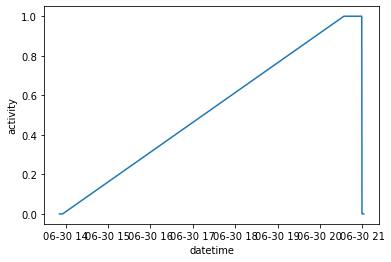

In [62]:
sns.lineplot(x=day_data.datetime, y=day_data.activity)

# 0.4 EDA(Exploratory Data Analysis)

They are the three Types Of Analysis :
 * Univariate analysis
 * Bivariate analysis
 * Multivariate analysis

## 1.Univariate analysis

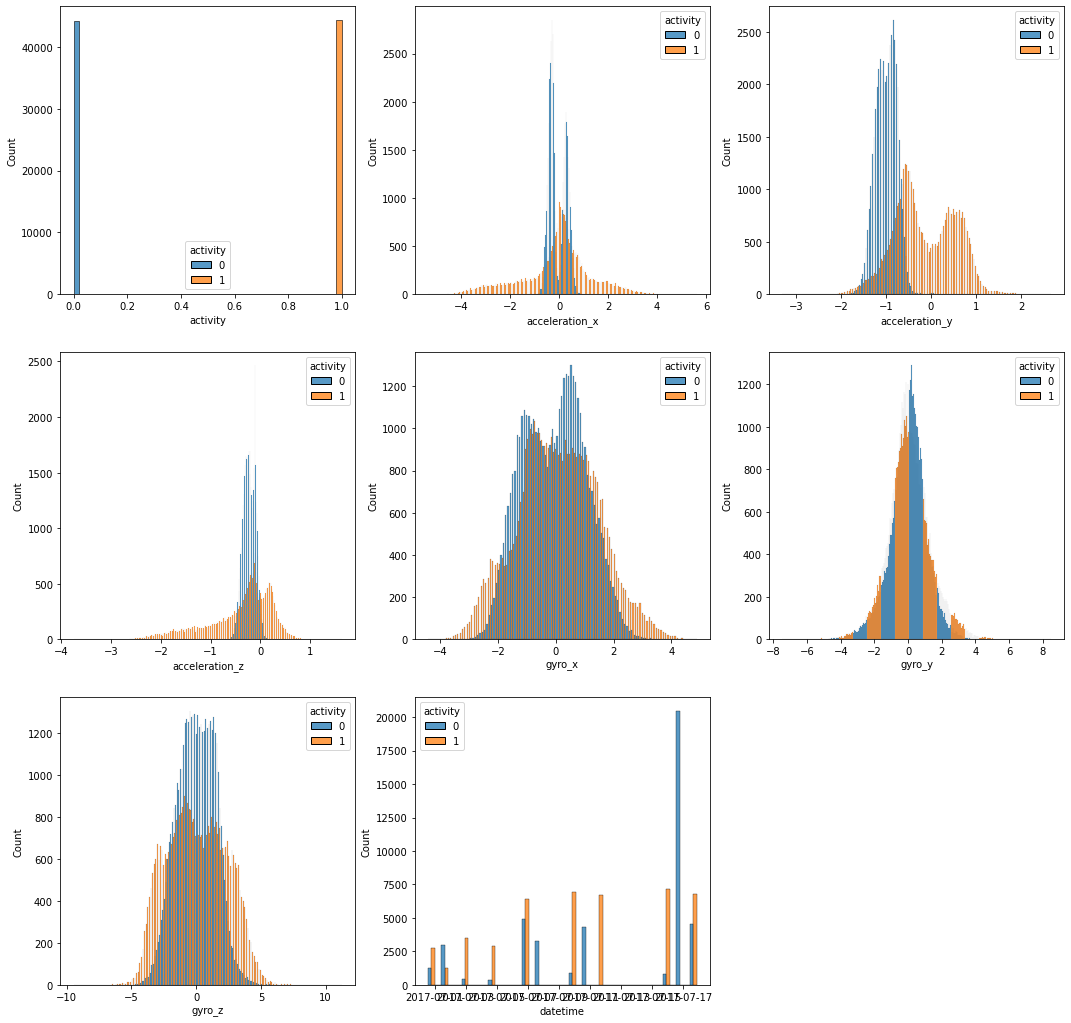

In [65]:
# Histogram plot 
plt.figure(figsize=(18,18))
pltno=1
for i in df:
    plt.subplot(3,3,pltno)
    sns.histplot(x=i,hue="activity",data=df,multiple="dodge")
    pltno+=1

####  Insight:
  * 1-->Running is higher in plot as 0.0 and 0-->walking is higher in plot as 1.0 in wrist plot
  * Running is higher than walking in Activity plot
  * Running-->1 after 0 ploting points is higher in acceleration_x plot
  * Running-->1 after -1.5 ploting points is higher in acceleration_y plot
  * Running-->1 after 0.2 ploting points is higher in acceleration_z plot
  * gyroy_xyz is higher ploting points is Running-->1

### * Identify the skewness and kurtosis

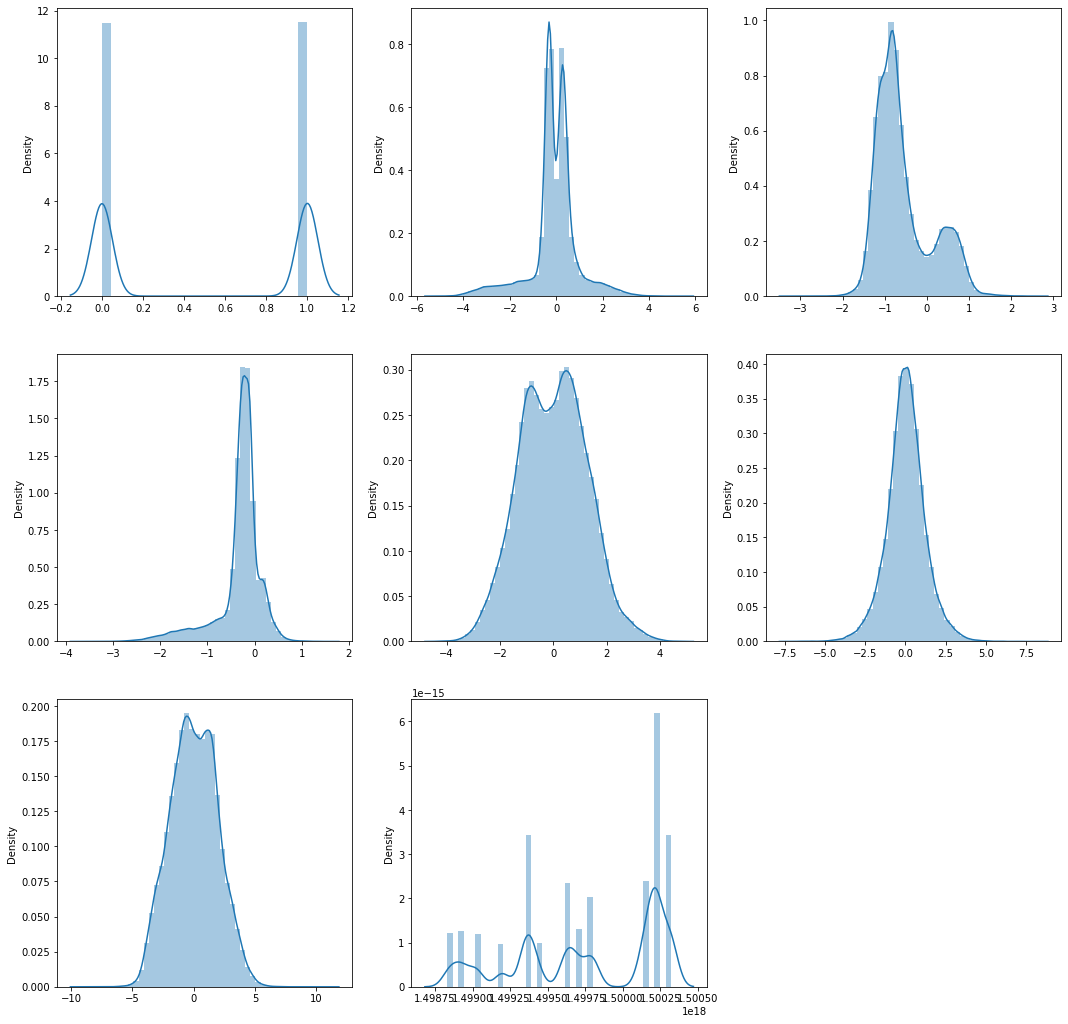

In [66]:
# distplot
plt.figure(figsize=(18,18))
pltno = 1

for i in df:

    plt.subplot(3,3,pltno)
    sns.distplot(x = df[i])
    pltno+=1

#### Insight:
* skewness is high

## 2.Bivariate analysis

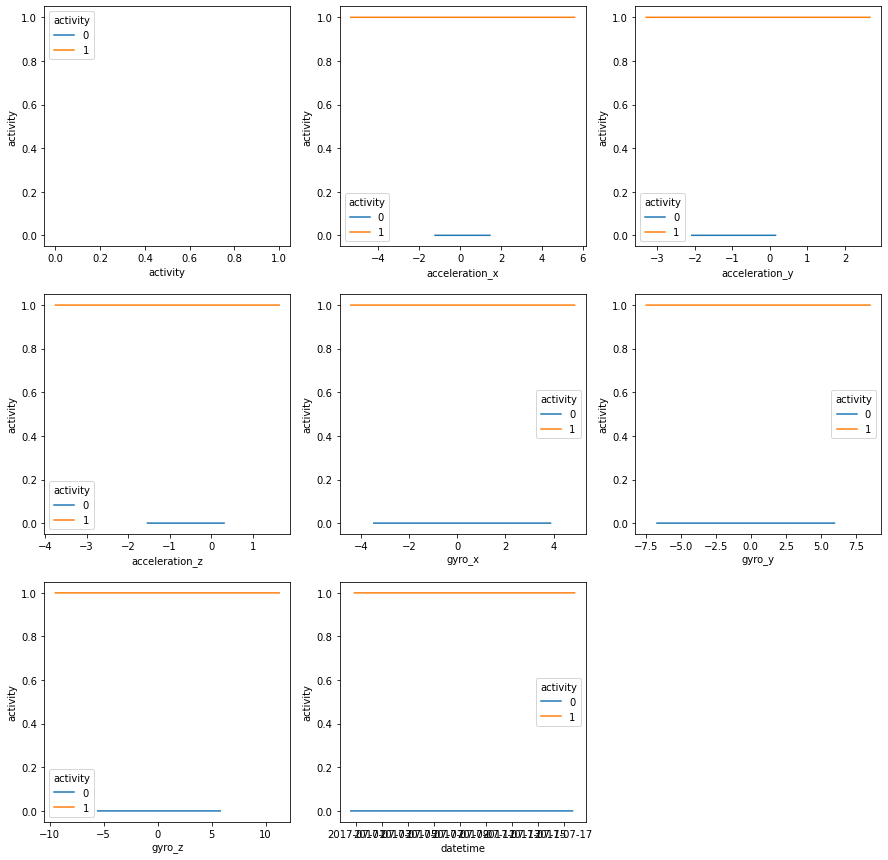

In [68]:
# Line plot
plt.figure(figsize=(15,15))
pltno = 1

for i in df:
    if pltno<=31:
        plt.subplot(3,3,pltno)
        sns.lineplot(x = i, y = "activity", data=df,hue="activity",ci=None) 
        pltno+=1

####  Insight:
 * Running is higher than walking

## 3.Multivariate analysis

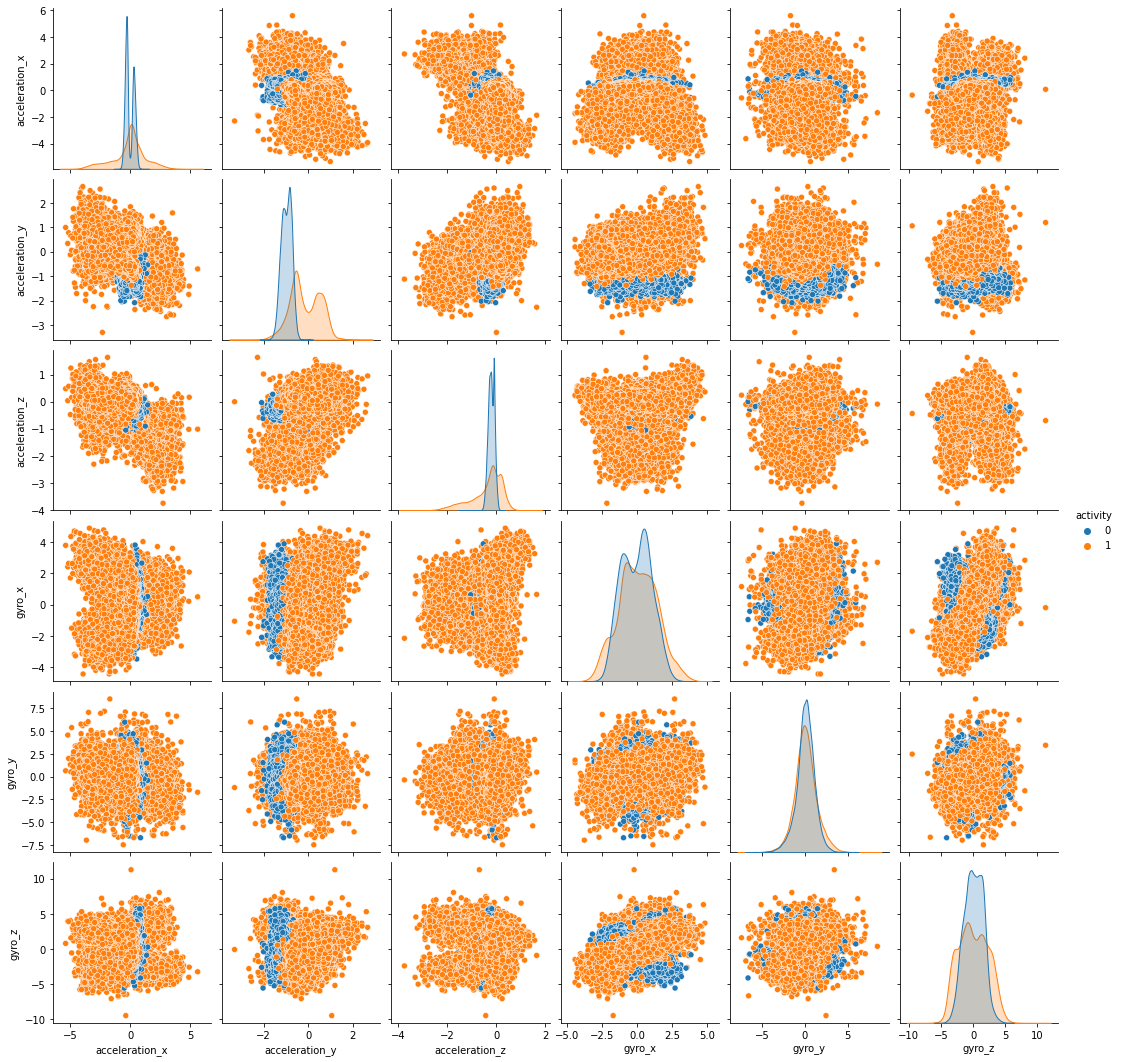

In [69]:
sns.pairplot(df,hue="activity")

#### Insight:
 * cluster between 0 and 1 but 1 is high it defined as Running

# 0.5 Feature Engineering

<AxesSubplot:>

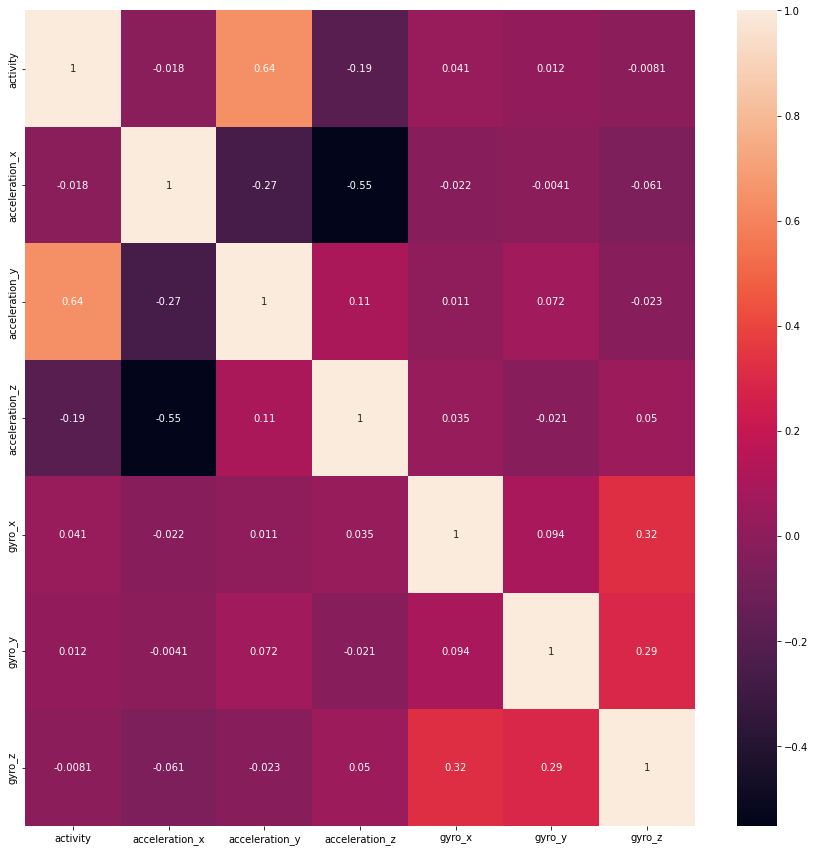

In [70]:
# HeatMap Plot
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

#### Insight:
* No correlation between any features

# 0.6 SMOTE

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
smote = SMOTE()
xsmote, ysmote = smote.fit_resample(x, y)

In [73]:
ysmote.value_counts()

0    44365
1    44365
Name: activity, dtype: int64

# 0.7 Scaler

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.33668266, -0.33231618,  0.6293112 , -0.05039065, -0.00392358,
        -1.5419494 ],
       [ 0.74013342, -0.85156246,  0.16342314, -0.14349622, -0.013684  ,
         0.05462392],
       [ 0.50997229, -1.39586742,  0.79323478, -0.72973418,  0.05764218,
        -1.28448139],
       ...,
       [-2.83940227,  1.47555388,  0.7523566 ,  1.80358291,  0.16433948,
         1.96011707],
       [ 0.05242424, -0.01293187,  0.98550605,  0.17299888, -1.32725368,
         0.32222559],
       [-2.08828236,  1.13931192,  0.73325272, -1.83327848, -0.53649241,
        -0.34037976]])

# 0.8 Train Test Split

In [76]:
from sklearn.model_selection import train_test_split as tts

In [77]:
xtrain, xtest, ytrain, ytest = tts(x_scaled, y, test_size=0.2, random_state=10)

# 0.9 Various Types of Models :

# 0.9.1 Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
logreg_pred = logreg.predict(xtest)

## * Model Evaluation

In [147]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [82]:
pd.crosstab(ytest, logreg_pred)

col_0,0,1
activity,,
0,7910,950
1,1681,7177


In [83]:
print(classification_report(ytest, logreg_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      8860
           1       0.88      0.81      0.85      8858

    accuracy                           0.85     17718
   macro avg       0.85      0.85      0.85     17718
weighted avg       0.85      0.85      0.85     17718



In [179]:
logreg_acc = accuracy_score(ytest, logreg_pred)
print ("Accuracy for Logistic Regression : {}".format(logreg_acc))

Accuracy for Logistic Regression : 0.851506942092787


# 0.9.2 KNN (K-Nearest Neighbor)

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
error_rate = []

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtrain, ytrain)
    knn_pred = knn.predict(xtest)
    error_rate.append(np.mean(knn_pred != ytest))

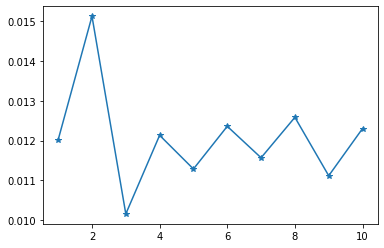

In [86]:
plt.plot(range(1,11), error_rate, marker = '*')

In [87]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xtrain, ytrain)
knn_pred = knn.predict(xtest)

## * Model Evaluation

In [88]:
pd.crosstab(ytest, knn_pred)

col_0,0,1
activity,,
0,8824,36
1,144,8714


In [89]:
print(classification_report(ytest, knn_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8860
           1       1.00      0.98      0.99      8858

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



In [180]:
knn_acc = accuracy_score(ytest, knn_pred)
print ("Accuracy for KNN : {}".format(knn_acc))

Accuracy for KNN : 0.9898408398239079


# 0.9.3 SVM (Support Vector Machine)

In [107]:
from sklearn.svm import SVC

In [108]:
svm = SVC()
svm.fit(xtrain, ytrain)
svm_pred = svm.predict(xtest)

## * Model Evaluation

In [109]:
pd.crosstab(ytest, svm_pred)

col_0,0,1
activity,,
0,8792,68
1,166,8692


In [110]:
print(classification_report(ytest, svm_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8860
           1       0.99      0.98      0.99      8858

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



In [181]:
svm_acc = accuracy_score(ytest, svm_pred)
print ("Accuracy for SVM : {}".format(svm_acc))

Accuracy for SVM : 0.9911953945140535


## * Hyper Parameter Tuning

In [152]:
grid = { 'C' : [0.01, 0.1, 1],
          'gamma' : [0.001, 0.01, 0.1, 1],
        'kernel' : ['rbf'],
        # 'random_state' : (list(range(1,10)))
        'random_state' : [10]
}

In [153]:
from sklearn.model_selection import GridSearchCV

svm1 = SVC()
gridcv = GridSearchCV(svm1, grid, refit = True, verbose = 2, scoring = 'accuracy', cv = 5)
gridcv.fit(xtrain,ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...C=0.01, gamma=0.001, kernel=rbf, random_state=10; total time= 4.5min
[CV] END ...C=0.01, gamma=0.001, kernel=rbf, random_state=10; total time= 4.0min
[CV] END ...C=0.01, gamma=0.001, kernel=rbf, random_state=10; total time= 3.7min
[CV] END ...C=0.01, gamma=0.001, kernel=rbf, random_state=10; total time= 3.8min
[CV] END ...C=0.01, gamma=0.001, kernel=rbf, random_state=10; total time= 3.6min
[CV] END ....C=0.01, gamma=0.01, kernel=rbf, random_state=10; total time= 2.0min
[CV] END ....C=0.01, gamma=0.01, kernel=rbf, random_state=10; total time= 2.0min
[CV] END ....C=0.01, gamma=0.01, kernel=rbf, random_state=10; total time= 2.1min
[CV] END ....C=0.01, gamma=0.01, kernel=rbf, random_state=10; total time= 2.1min
[CV] END ....C=0.01, gamma=0.01, kernel=rbf, random_state=10; total time= 1.9min
[CV] END .....C=0.01, gamma=0.1, kernel=rbf, random_state=10; total time=  52.3s
[CV] END .....C=0.01, gamma=0.1, kernel=rbf, ran

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf'], 'random_state': [10]},
             scoring='accuracy', verbose=2)

In [154]:
gridcv.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf', 'random_state': 10}

In [155]:
svm = SVC(C = 1, gamma = 1,kernel = 'rbf', random_state = 10)
svm.fit(xtrain, ytrain)
svm_pred = svm.predict(xtest)

## * Model Evaluation

In [156]:
pd.crosstab(ytest, svm_pred)

col_0,0,1
activity,,
0,8803,57
1,99,8759


In [157]:
print(classification_report(ytest, svm_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8860
           1       0.99      0.99      0.99      8858

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



In [182]:
svm_acc = accuracy_score(ytest, svm_pred)
print ("Accuracy for SVM : {}".format(svm_acc))

Accuracy for SVM : 0.9911953945140535


# 0.9.4 RandomForest Classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
rfc_pred = rfc.predict(xtest)

## * Model Evaluation

In [114]:
pd.crosstab(ytest, rfc_pred)

col_0,0,1
activity,,
0,8779,81
1,107,8751


In [115]:
print(classification_report(ytest, rfc_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8860
           1       0.99      0.99      0.99      8858

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



In [183]:
rfc_acc = accuracy_score(ytest, rfc_pred)
print ("Accuracy for RandomForest : {}".format(rfc_acc))

Accuracy for RandomForest : 0.9885427249125184


## * Hyper Parameter Tuning

In [159]:
from sklearn.model_selection import RandomizedSearchCV as RSCV

In [160]:
rgrid = {'n_estimators': [30,40,50],
         'max_features': ['sqrt', 'log2'],
         'max_depth': [10, 20, 30],
         'bootstrap': [True, False],
         'min_samples_split' : [2, 5, 10],
          'min_samples_leaf':[2,4,6]}

In [161]:
rfcv = RSCV(estimator=rfc, scoring = 'accuracy', param_distributions = rgrid,
            cv = 3, verbose = 2, random_state=10, n_jobs = -1, n_iter = 10)

In [162]:
rfcv.fit(xtrain, ytrain)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [2, 4, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [30, 40, 50]},
                   random_state=10, scoring='accuracy', verbose=2)

In [163]:
rfcv.best_params_

{'n_estimators': 30,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [164]:
rfc = RandomForestClassifier(n_estimators = 30, min_samples_split = 5, min_samples_leaf = 2,
                            max_features = 'sqrt', max_depth = 20, bootstrap = False)

In [165]:
rfc.fit(xtrain, ytrain)
rfc_pred = rfc.predict(xtest)

## * Model Evaluation

In [166]:
pd.crosstab(ytest, rfc_pred)

col_0,0,1
activity,,
0,8775,85
1,118,8740


In [167]:
print(classification_report(ytest, rfc_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8860
           1       0.99      0.99      0.99      8858

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



In [184]:
rfc_acc = accuracy_score(ytest, rfc_pred)
print ("Accuracy for RandomForest : {}".format(rfc_acc))

Accuracy for RandomForest : 0.9885427249125184


# 0.9.5 XGBoosting

In [117]:
import xgboost
from xgboost import XGBClassifier

In [118]:
xgb = XGBClassifier()
xgb.fit(xtrain, ytrain)
xgb_pred = xgb.predict(xtest)

## * Model Evaluation

In [119]:
pd.crosstab(ytest, xgb_pred)

col_0,0,1
activity,,
0,8802,58
1,104,8754


In [120]:
print(classification_report(ytest, xgb_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8860
           1       0.99      0.99      0.99      8858

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



In [185]:
xgb_acc = accuracy_score(ytest, xgb_pred)
print ("Accuracy for XGBoosting : {}".format(xgb_acc))

Accuracy for XGBoosting : 0.9905181171689807


## * Hyper Parameter Tuning for XGBoost

In [170]:
rgrid = {'gamma' : [0.1, 0.2, 0.4, 0.8, 1, 2],
          'max_depth' : [7, 4, 11, 16, 20],
          'learning_rate' : [0.01, 0.001, 0.1, 0.5],
          'n_estimators' : [25, 50, 75, 100]}

In [171]:
xgb1 = XGBClassifier(verbosity = 2, random_state = 10)
rcv = RSCV(estimator=xgb1, param_distributions=rgrid, scoring='accuracy',
                         n_iter=10, cv = 3, verbose = 2, random_state=10,
                         n_jobs=-1)

In [172]:
rcv.fit(xtrain, ytrain)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[11:54:04] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 598 extra nodes, 40 pruned nodes, max_depth=20
[11:54:04] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 566 extra nodes, 38 pruned nodes, max_depth=20
[11:54:04] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 578 extra nodes, 58 pruned nodes, max_depth=20
[11:54:04] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\tree\updater_prune.cc:98: tree pruning end, 610 extra nodes, 42 pruned nodes, max_depth=20
[11:54:04] INFO: C:\buildkite-a

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                   

In [173]:
rcv.best_params_

{'n_estimators': 100, 'max_depth': 20, 'learning_rate': 0.1, 'gamma': 0.4}

In [174]:
xgb = XGBClassifier(n_estimators=100, max_depth=20,
                    learning_rate=0.1, gamma=0.4, random_state = 10)
xgb.fit(xtrain, ytrain)
xgb_pred = xgb.predict(xtest)

## * Model Evaluation

In [175]:
pd.crosstab(ytest, xgb_pred)

col_0,0,1
activity,,
0,8800,60
1,108,8750


In [176]:
print(classification_report(ytest, xgb_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8860
           1       0.99      0.99      0.99      8858

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



In [186]:
xgb_acc = accuracy_score(ytest, xgb_pred)
print ("Accuracy for XGBoosting : {}".format(xgb_acc))

Accuracy for XGBoosting : 0.9905181171689807


# 0.9.6 Naive Bayes

In [124]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

# instantiate the estimator
nb = GaussianNB()

# fit the model
nb.fit(xtrain, ytrain)

pred_nd=nb.predict(xtest)

## * Model Evaluation

In [126]:
pd.crosstab(ytest, pred_nd)

col_0,0,1
activity,,
0,8778,82
1,645,8213


In [128]:
print(classification_report(ytest,pred_nd))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8860
           1       0.99      0.93      0.96      8858

    accuracy                           0.96     17718
   macro avg       0.96      0.96      0.96     17718
weighted avg       0.96      0.96      0.96     17718



In [129]:
nb_acc = accuracy_score(ytest, pred_nd)
print ("Accuracy for Gaussian Naive Bayes: {}".format(nb_acc))

Accuracy for Gaussian Naive Bayes: 0.958968280844339


# 0.9.7 ANN (Artificial Neural Network)

In [91]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [92]:
x_train = np.array(xtrain)
x_test = np.array(xtest)

In [93]:
# Create the RNN model
ann = Sequential()
# rnn.add(Embedding(input_dim=x_train.shape[1], output_dim=128))
ann.add(Dense(250, activation = 'relu', input_shape = (6,)))
# rnn.add(SimpleRNN(128))
ann.add(Dense(1, activation='sigmoid'))
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 250)               1750      
                                                                 
 dense_3 (Dense)             (None, 1)                 251       
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Compile the model
ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [95]:
# Train the model
ann.fit(x_train, ytrain, epochs=20,validation_split=0.2,steps_per_epoch=100, verbose=2)

Epoch 1/20
100/100 - 1s - loss: 0.3763 - accuracy: 0.9044 - val_loss: 0.2058 - val_accuracy: 0.9515 - 1s/epoch - 13ms/step
Epoch 2/20
100/100 - 1s - loss: 0.1590 - accuracy: 0.9585 - val_loss: 0.1244 - val_accuracy: 0.9678 - 623ms/epoch - 6ms/step
Epoch 3/20
100/100 - 1s - loss: 0.1111 - accuracy: 0.9682 - val_loss: 0.0951 - val_accuracy: 0.9741 - 577ms/epoch - 6ms/step
Epoch 4/20
100/100 - 1s - loss: 0.0895 - accuracy: 0.9741 - val_loss: 0.0795 - val_accuracy: 0.9773 - 580ms/epoch - 6ms/step
Epoch 5/20
100/100 - 1s - loss: 0.0769 - accuracy: 0.9771 - val_loss: 0.0698 - val_accuracy: 0.9793 - 597ms/epoch - 6ms/step
Epoch 6/20
100/100 - 1s - loss: 0.0689 - accuracy: 0.9790 - val_loss: 0.0634 - val_accuracy: 0.9812 - 588ms/epoch - 6ms/step
Epoch 7/20
100/100 - 1s - loss: 0.0634 - accuracy: 0.9807 - val_loss: 0.0596 - val_accuracy: 0.9824 - 587ms/epoch - 6ms/step
Epoch 8/20
100/100 - 1s - loss: 0.0597 - accuracy: 0.9815 - val_loss: 0.0562 - val_accuracy: 0.9829 - 560ms/epoch - 6ms/step
Ep

In [96]:
ann_pred = ann.predict(xtest)

554/554 [==============================] - 1s 1ms/step


## * Model Evaluation

In [140]:
ann_score = ann.evaluate(xtest, ytest, verbose=0)
ann_accuracy = 100 * ann_score[1]
ann_loss = 100 * ann_score[0]
ann_acc = ann_score[1]
print(ann_score)
print(ann_loss)
print(ann_accuracy)
print(ann_acc)

[0.045212697237730026, 0.9854385256767273]
4.521269723773003
98.54385256767273
0.9854385256767273


In [187]:
print ("Accuracy for ANN: {}".format(ann_accuracy))

Accuracy for ANN: 98.54385256767273


# 0.9.8 LightGBM

In [102]:
from lightgbm import LGBMClassifier

In [103]:
lc = LGBMClassifier()
lc.fit(xtrain, ytrain)
lc_pred = lc.predict(xtest)

[LightGBM] [Info] Number of positive: 35507, number of negative: 35363
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 70870, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501016 -> initscore=0.004064
[LightGBM] [Info] Start training from score 0.004064


## * Model Evaluation

In [104]:
pd.crosstab(ytest, lc_pred)

col_0,0,1
activity,,
0,8788,72
1,113,8745


In [105]:
print(classification_report(ytest, lc_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8860
           1       0.99      0.99      0.99      8858

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



In [130]:
lc_acc = accuracy_score(ytest, lc_pred)
print ("Accuracy for lightclassifier: {}".format(lc_acc))

Accuracy for lightclassifier: 0.9895586409301276


# 1.Accuracy For Model Comparison

In [209]:
model_accuracy = pd.DataFrame([logreg_acc, knn_acc, svm_acc, rfc_acc, xgb_acc, ann_acc, lc_acc,nb_acc],
                              index = ['Logistic_Regression', 'KNN_Classifier', 'SVM', 'RandomForest_Classifier', 'XGBoosting', 'ANN', 'LightGBM','GaussianNB'],
                              columns = ['Accuracy'])
model_accuracy = model_accuracy.sort_values('Accuracy', ascending=False)
model_accuracy

,Accuracy
SVM,0.991195
XGBoosting,0.990518
KNN_Classifier,0.989841
LightGBM,0.989559
RandomForest_Classifier,0.988543
ANN,0.985439
GaussianNB,0.958968
Logistic_Regression,0.851507


<AxesSubplot:xlabel='Accuracy'>

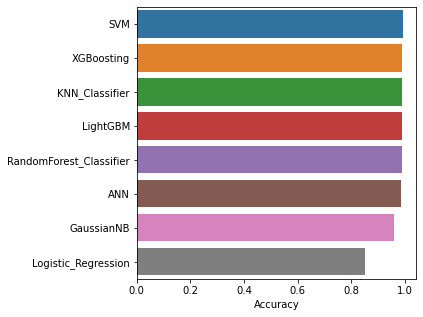

In [210]:
plt.figure(figsize=(5,5))
sns.barplot(y=model_accuracy.index, x=model_accuracy.Accuracy)

# Saving the Model

In [197]:
import pickle
file = open('walkrunclass.pkl', 'wb')
pickle.dump(svm,file)

# Conclusion:
   *  After applying various machine learning models to the "walkrunclass" dataset, we can draw the following conclusions:

####  Logistic Regression: 
This model provides a baseline for classification tasks. It may work reasonably well for this dataset, especially if the relationship between features and the target variable is roughly linear. 
Accuracy we received from this model is 85.1507%

####  Support Vector Machine (SVM): 
SVM is effective for binary classification problems. It can create a clear separation between "walk" and "run" activities if they are linearly separable in the feature space.
Accuracy we received from this model is 99.1195%

####  K-Nearest Neighbors (K-NN): 
K-NN is a simple yet powerful algorithm. Its performance depends on the choice of 'K' and the distance metric used. It may work well if there are clear clusters of "walk" and "run" instances.
Accuracy we received from this model is 98.9841%

####  XGBoosting and LightGBM: 
These are gradient boosting algorithms that are known for their high accuracy. They can capture complex relationships in the data and are likely to perform well if tuned properly.
Accuracy we received from XGBoosting model is 99.0518%
Accuracy we received from LightGBM model is 98.9559%

####  Random Forest Classification: 
Random Forest is an ensemble method that combines multiple decision trees. It's robust and generally provides good results for classification tasks.
Accuracy we received from this model is 98.8543%

####  Artificial Neural Network (ANN): 
ANN is a deep learning model capable of learning complex patterns. It can be effective but may require extensive tuning and a large amount of data.
Accuracy we received from this model is 98.5439%

####  Naive Bayes (GaussianNB): 
Naive Bayes is a simple probabilistic classifier. It assumes that features are independent, which may or may not hold true for this dataset. Its performance can vary.
Accuracy we received from this model is 95.8968%

## Final conclusion :
SVM Model has perform well amongst the various Classification models with 99.1195% accuracy.


# Risk Facing The Model:
   When working with machine learning models, there are several risks and considerations to keep in mind.
#### Overfitting: 
All models, especially complex ones like ANNs and ensemble methods, are susceptible to overfitting if not properly regularized or if the dataset is too small.

#### Data Quality: 
The quality of the dataset is crucial. Inaccurate or incomplete data can lead to poor model performance.

#### Class Imbalance: 
If the dataset has an imbalance between the "walk" and "run" classes, models may be biased towards the majority class.

#### Hyperparameter Tuning: 
The performance of many models depends on hyperparameter settings. Hyperparameter tuning is necessary to optimize model performance.

#### Interpretability: 
Some models, like ANNs and ensemble methods, may provide accurate predictions but lack interpretability, making it challenging to understand why a particular prediction was made.

#### Computational Resources: 
Deep learning models like ANNs can be computationally expensive to train, requiring powerful hardware.

#### Generalization: 
The models' ability to generalize to new, unseen data is a key concern. Cross-validation can help assess generalization performance.

 * In conclusion, the choice of the machine learning model should be based on the specific characteristics of the "walkrunclass" dataset and the desired trade-off between model complexity and interpretability. Careful preprocessing, hyperparameter tuning, and performance evaluation are essential steps to mitigate risks and obtain the best model for the task.